> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Tmdb-movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

I have two questions about the tmdb-movies data set.

1. What's the correlation of popularity and budget together on revenue?

   This question has multiple variable explorations: popularity, budget and revenue.


2. Which genres are most popular from year to year? 
   
   This question has one variable explorations: genres and release_year.
   

3. What's the profit changes along the year for Mad Max serials?
   
   I am into film: Mad Max, so I dig some information about it.
   This question has single variable exploration: profit and release_year.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


get the rows and columns number

In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


check data missings

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


remove unrelated columns

In [7]:
df.drop(['imdb_id', 'homepage', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

check dropped table information

In [8]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


remove the erroneous values

In [9]:
# filter datasets for rows 'budget', 'revenue',  'runtime' are not zero, which is creating noise in our analysis
df = df.query('budget != 0')
df = df.query('revenue != 0')
df = df.query('runtime != 0')

remove the Nan/null values

In [10]:
df.dropna(inplace=True)
# checks if any of columns have null values - should print False
df.isnull().sum().any()

False

remove the duplicated rows

In [11]:
df.drop_duplicates(inplace=True)
# print number of duplicates again to confirm dedupe - should be 0
sum(df.duplicated())

0

In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3445.000000,3445.000000,3.445000e+03,3.445000e+03,3445.000000,3445.000000,3445.000000,3445.000000
mean,38496.391001,1.268127,3.937705e+07,1.166624e+08,109.403193,573.448186,6.184383,2001.038897
std,66315.528772,1.533870,4.329284e+07,1.830498e+08,19.694966,915.245414,0.788992,11.379944
min,5.000000,0.010335,1.000000e+00,2.000000e+00,26.000000,10.000000,2.200000,1960.000000
25%,4959.000000,0.507078,1.100000e+07,1.697446e+07,96.000000,86.000000,5.700000,1995.000000
50%,10876.000000,0.876503,2.500000e+07,5.203489e+07,106.000000,238.000000,6.200000,2004.000000
75%,37724.000000,1.464555,5.100000e+07,1.382591e+08,119.000000,631.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


### Research Question 1: what's the correlation of popularity and budget together on revenue?

check the correlation of budget and popularity, and their correlation on revenue

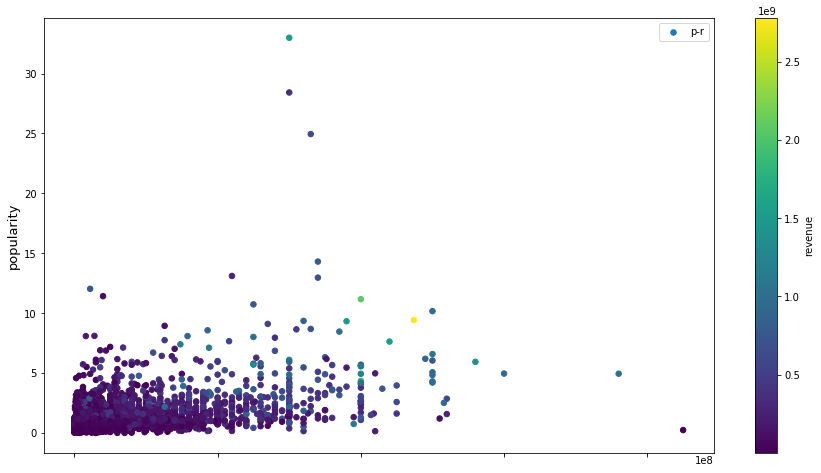

In [40]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.plot.scatter(x='budget', y='popularity', c='revenue', colormap='viridis', s=30, figsize=(15, 8), label='b-p');
plt.xlabel('budget', fontsize=13)
plt.ylabel('popularity', fontsize=13)
plt.legend()

> 1. xlabel popularity disappears, I don't know the reason yet.
> 2. from the figure above we know that, 1) in general, more budget more revenue. 2) in general, more popularity more revenue. 3) sometimes high budget will not have high popularity. 4) sometimes high popularity will not have high revenue. 5) sometimes high budget will not have high revenue.

### Research Question 2: Which genres are most popular from year to year?

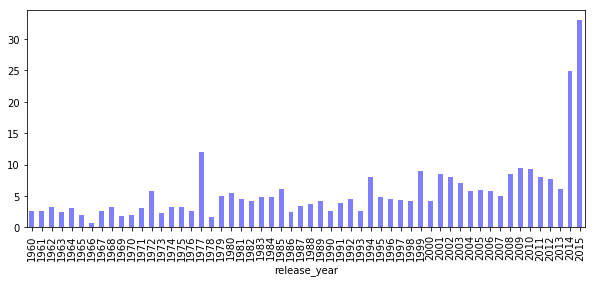

In [41]:
df.groupby('release_year').popularity.max().plot(kind='bar', figsize=(10, 4), alpha=0.5, color='blue')

> From the graph above, we know that the most popularity increase yearly in general, especially for 2014, 2015

get the max popularity row for each release_year

In [42]:
df_out = df.groupby(['release_year'], as_index=False).apply(lambda t: t[t.popularity == t.popularity.max()])

for convenience, only use the first genre from the genres list

In [43]:
df_out = df_out[['release_year', 'genres']]
df_out['genre_first'] = df_out['genres'].apply(lambda t: t.split('|')[0])
df_out.head(3)

,,release_year,genres,genre_first
0,10141,1960,Drama|Horror|Thriller,Drama
1,10110,1961,Adventure|Animation|Comedy|Family,Adventure
2,9849,1962,Adventure|Action|Thriller,Adventure


generate the graphy

Text(0,0.5,'Year Counts')

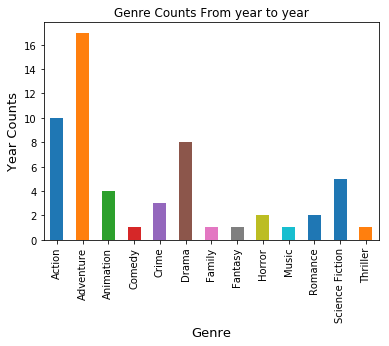

In [44]:
df_out.groupby(['genre_first']).release_year.count().plot(kind='bar', title='Genre Counts From year to year')
plt.xlabel('Genre', fontsize=13)
plt.ylabel('Year Counts', fontsize=13)

> figure above is the result for calculating each genre counts for all the years.

### Research Question 3: What's the profit changes along the year for Mad Max serials?

In [45]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df['profit'] = df.revenue - df.budget

In [46]:
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,185238201


In [47]:
df_mad = df[df['original_title'].str.contains(r'^Mad Max')]

In [48]:
df_mad

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354
6084,9355,1.746063,12305523,36230219,Mad Max Beyond Thunderdome,Mel Gibson|Tina Turner|Bruce Spence|Helen Buda...,George Miller|George Ogilvie,Two men enter. One man leaves.,arena|sandstorm|dystopia|oasis|sequel,107,Action|Adventure|Drama|Science Fiction,Kennedy Miller Productions,6/29/85,428,5.8,1985,23924696
7827,9659,2.012021,400000,100000000,Mad Max,Mel Gibson|Joanne Samuel|Hugh Keays-Byrne|Stev...,George Miller,The Maximum Force Of The Future,chain|baby|bridge|post-apocalyptic|dystopia,93,Adventure|Action|Thriller|Science Fiction,Kennedy Miller Productions|Mad Max Films|Cross...,4/12/79,667,6.5,1979,99600000
8379,8810,1.248748,2000000,24600832,Mad Max 2,Mel Gibson|Bruce Spence|Michael Preston|Max Ph...,George Miller,"When all that's left is one last chance, pray ...",boomerang|chase|post-apocalyptic|dystopia|surv...,95,Adventure|Action|Thriller|Science Fiction,Kennedy Miller Productions,12/23/81,501,7.1,1981,22600832


Text(0,0.5,'Profit')

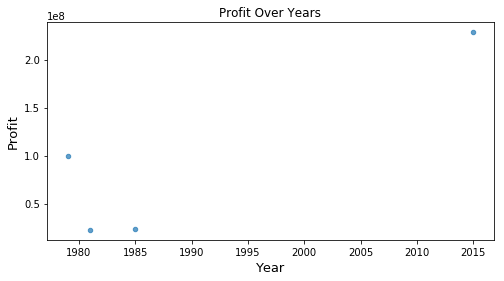

In [49]:
df_mad.plot.scatter(x='release_year', y='profit', figsize=(8, 4), title='Profit Over Years', alpha=.7)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Profit', fontsize=13)

> figure above is the result for film Mad Max's profit with its release_years.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### what's the correlation of popularity and budget together on revenue?
1. in general, more budget more revenue. 
2. in general, more popularity more revenue. 
3. sometimes high budget will not have high popularity. 
4. sometimes high popularity will not have high revenue. 
5. sometimes high budget will not have high revenue.

### Which genres are most popular from year to year?
Adventure type movie is the most popular from year to year.

> Note: for convenience, I only use the first Genre type from Genres column.

### What's the profit changes along the year for Mad Max serials?
1. each profit of the serials is positive
2. first serial's profit is larger than the second and third's
3. the highest profit for the serials is the newest: "Mad Max: Fury Road"